# Context
## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Content
## Attributes

### People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise
### Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years
### Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
### Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month
### Target
    Need to perform clustering to summarize customer segments.

### Acknowledgement
    The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("marketing_campaign.csv",sep="\t",parse_dates=["Dt_Customer"]);data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,1994,387,2125,8180,2569,2114,9736,4939,6565,2278
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,1983,1976,1959,1952,1987,1946,1980,1946,1949,1985
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,Graduation,Basic,Graduation,Master,Graduation,PhD,Graduation,Graduation,Master,2n Cycle
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,Married,Married,Divorced,Divorced,Married,Single,Married,Together,Married,Single
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,NaN,7500.0,63033.0,59354.0,17323.0,82800.0,41850.0,37760.0,76995.0,33812.0
Kidhome,0,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0
Dt_Customer,2012-04-09 00:00:00,2014-08-03 00:00:00,2013-08-21 00:00:00,2014-10-02 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-08-05 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00,2013-11-15 00:00:00,2012-11-13 00:00:00,2013-11-15 00:00:00,2013-11-15 00:00:00,2012-10-10 00:00:00,2012-11-24 00:00:00,2012-12-24 00:00:00,2012-08-31 00:00:00,2013-03-28 00:00:00,2012-03-11 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68,11,59,82,53,38,23,51,20,91,86
MntWines,635,11,426,11,173,520,235,76,14,28,5,6,194,233,3,1006,53,84,1012,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Let's look at weather there are missing values or not

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Let's just drop out missing values since it is small in size

In [5]:
data.dropna(inplace=True)

In [6]:
#Instead of year of birth, age is calculated.
data["Age"]= 2021 - data["Year_Birth"]

In [7]:
data.describe()
#There are some outliers observed in Income and Age so it is limited to certain gap. 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,52.179603
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,128.000000


In [8]:
data = data[data["Income"]<250000]
data = data[data["Age"]<90]

In [9]:
data.Education.value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [10]:
#Instead of various education level I just narrowed it to 2. Undergraduate and Postgraduate.
data.Education = data.Education.replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Postgraduate","PhD":"Postgraduate","Master":"Postgraduate"})

In [11]:
data.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
#Again instead of describing same meanings in different terms I just narrowed into 2. Together and Single.
data["Marital_Status"].replace({"Married":"Together","Alone":"Single","Absurd":"Single","YOLO":"Single","Divorced":"Single","Widow":"Single"},inplace=True)

In [13]:
data.Marital_Status.value_counts()

Together    1428
Single       784
Name: Marital_Status, dtype: int64

In [14]:
#Some alterations have been made for easily readed columns. 
data.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"MeatProducts","MntFishProducts":"FishProducts","MntSweetProducts":"SweetProducts","MntGoldProds":"GoldProds"},inplace=True)

In [15]:
#Instead of writing down spending for each and every products, I just calculate total spending since overall spending is giving us 
#big picture. I will do a pair-wise analysis on all product later on.
data["Total Spending"] = data["Wines"] + data["Fruits"] + data["MeatProducts"] + data["FishProducts"] + data["SweetProducts"] + data["GoldProds"]

In [16]:
#Let's check first which group spends the most in average:
data.groupby("Education")[["Total Spending","Income"]].mean()

,Total Spending,Income
Education,,
Postgraduate,632.633163,53268.640306
Undergraduate,409.984127,41771.246032


In [17]:
#Again instead of seperating kids and teens I just calculate total to see the big picture.
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [18]:
#Instead of registary date, seniority level of the customers are calculated.
data["Seniority"] = data.Dt_Customer.map(lambda x: data.Dt_Customer.max()-x)

In [19]:
data["Family_Size"] = data["Marital_Status"].replace({"Together":2,"Single":1}) + data["Children"]

In [20]:
#Seeing majority of family sizes in our dataset.
data.groupby(by="Family_Size")[["Family_Size"]].size()/len(data)

Family_Size
1    0.113924
2    0.340868
3    0.397378
4    0.133816
5    0.014014
dtype: float64

In [21]:
#Observing which family size spend the most on average
data.groupby(by="Family_Size")[["Total Spending","Income","NumDealsPurchases"]].mean()

,Total Spending,Income,NumDealsPurchases
Family_Size,,,
1,1107.230159,65534.432540,1.194444
2,785.643236,56156.034483,1.801061
3,443.397042,46964.887372,2.609784
4,246.162162,45083.131757,3.608108
5,299.032258,46768.354839,3.903226


In [22]:
#Calculating total acceptence size of campaigns
data["TotalAcceptedCmp"] = (data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 + data.AcceptedCmp4 + data.AcceptedCmp5)

<AxesSubplot:>

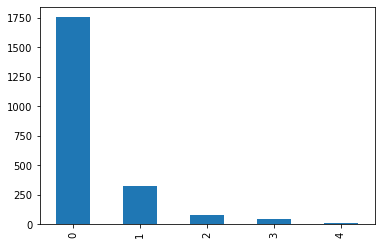

In [23]:
#Plotting the size of total accepted campaigns by number of campaigns accepted for each and every customer
data.TotalAcceptedCmp.value_counts().plot(kind="bar")

In [24]:
data[(data.Complain ==1) & (data.TotalAcceptedCmp >0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Children,Seniority,Family_Size,TotalAcceptedCmp
1323,10971,1977,Postgraduate,Single,37774.0,2,0,2012-03-09,28,173,...,1,3,11,1,44,473,2,1002 days,3,1
1850,4427,1995,Undergraduate,Single,83257.0,0,0,2012-09-18,56,536,...,1,3,11,1,26,1365,0,809 days,1,2


From there it can clearly seen that there is no corrolation between complainment and giving that customer a promotion. So there is no need to give a promotion to customer who has a complain.

In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Total Spending', 'Children',
       'Seniority', 'Family_Size', 'TotalAcceptedCmp'],
      dtype='object')

In [26]:
#I can drop some columns since it will not be needed.
data.drop(columns=["Year_Birth","ID","Z_CostContact","Z_Revenue","Marital_Status","Dt_Customer"],inplace=True)

In [27]:
data.dtypes[data.dtypes == "object"]

Education    object
dtype: object

In [28]:
#In order to get rid of object data types, I applied label encoder to transform it in numbers.
label_encoder = LabelEncoder()
data["Education"] = label_encoder.fit_transform(data["Education"])
data["Education"].unique()

array([0, 1])

In [29]:
#It is applied the same technique for Seniority column.
data.Seniority = label_encoder.fit_transform(data.Seniority);data.Seniority

0       646
1        27
2       294
3        16
4       157
       ... 
2235    359
2236     12
2237    152
2238    153
2239    574
Name: Seniority, Length: 2212, dtype: int64

In [30]:
data.dtypes

Education                int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
MeatProducts             int64
FishProducts             int64
SweetProducts            int64
GoldProds                int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Total Spending           int64
Children                 int64
Seniority                int64
Family_Size              int64
TotalAcceptedCmp         int64
dtype: object

In [31]:
#Since there are no object and datetime variable in our dataset, scaler can be applied.
#Scaler should be applied since our values for each and every column is in different range and those should be in
#similar range to obtain healty results.
scaler = StandardScaler()
scaler.fit(data)
scaler_df = pd.DataFrame(scaler.transform(data), columns=data.columns)

In [32]:
scaler_df.head().T

,0,1,2,3,4
Education,-0.358569,-0.358569,-0.358569,-0.358569,-0.358569
Income,0.287105,-0.260882,0.913196,-1.176114,0.294307
Kidhome,-0.822754,1.040021,-0.822754,1.040021,1.040021
Teenhome,-0.929699,0.908097,-0.929699,-0.929699,-0.929699
Recency,0.310353,-0.380813,-0.795514,-0.795514,1.554453
Wines,0.977660,-0.872618,0.357935,-0.872618,-0.392257
Fruits,1.552041,-0.637461,0.570540,-0.561961,0.419540
MeatProducts,1.690293,-0.718230,-0.178542,-0.655787,-0.218684
FishProducts,2.453472,-0.651004,1.339513,-0.504911,0.152508
SweetProducts,1.483713,-0.634019,-0.147184,-0.585335,-0.001133


# Principle Component Analysis
It is a dimentionality reduction technic. Dimensionality reduction is used when there are lots of features and some features are highly corrolated with each other. Instead of using corrolated features, we use uncorrolated features to obtain more accurate results. In PCA, corrolated columns are calculated and clustered with each other so we can see clearly which columns are corrolated and escape using those sorrolated columns in our model.  

In [33]:
pca = PCA()
pca.fit(scaler.transform(data))
pca_data = pca.transform(scaler.transform(data))

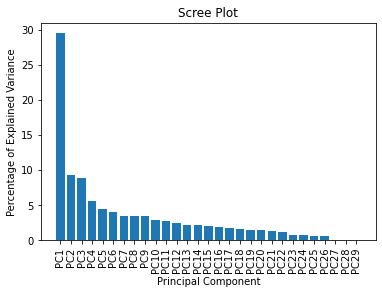

In [34]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('Scree Plot')
plt.show()
#Above, for 1 column variance can be explained %30. for 1 and 2 component or feature, %40 of varience can be explained.

From that plot, we can clearly see that after 3th component, varience explanation become unimportant. So we can build our model for 3 features again. 

In [35]:
pca = PCA(n_components=3)
pca.fit(scaler.transform(data))
#Let's store it in a Data Frame
PCA_df = pd.DataFrame(pca.transform(scaler.transform(data)),columns=["PCA1","PCA2","PCA3"])

In [36]:
PCA_df

,PCA1,PCA2,PCA3
0,4.437286,-0.323290,-1.271310
1,-2.945381,0.355435,0.001528
2,1.884233,-0.804150,-1.383938
3,-2.730805,-1.574676,0.468370
4,-0.699081,-0.116840,-0.661122
...,...,...,...
2207,2.221383,1.623548,-1.804190
2208,-1.978565,4.498007,1.607817
2209,2.515561,-0.882014,1.170223
2210,1.420099,1.144863,-1.622343


In [37]:
#Let's calculate inertias for each and all clusters
wcss=[]
KMeans()
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

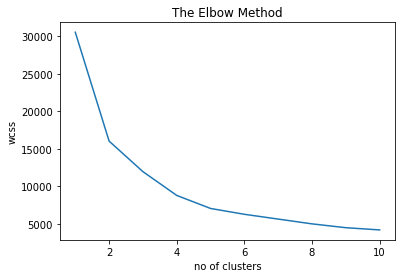

In [38]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
#From above, after 4th cluster, inertia does not improve greatly. So 4 clusters will be applied.
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(PCA_df)

In [40]:
#Let's add clusters in reduction data frame and our original data
PCA_df["Clusters"] = y_kmeans
data["Clusters"] = y_kmeans

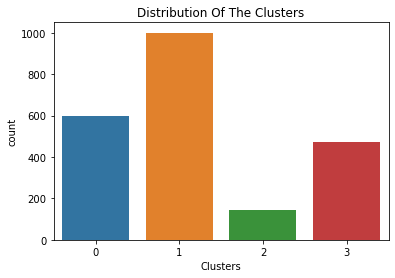

In [41]:
sns.countplot(data=data,x=data["Clusters"]).set_title("Distribution Of The Clusters")
plt.show()

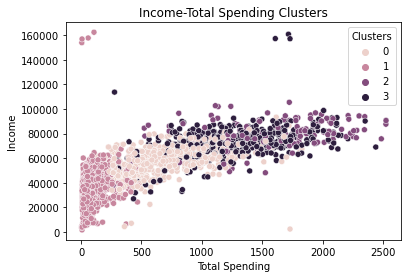

In [42]:
sns.scatterplot(data=data,x=data["Total Spending"],y=data["Income"],hue=data["Clusters"]).set_title("Income-Total Spending Clusters")
plt.show()

From above plot;
* Cluster 0 can be named as average-income and average-spending customers
* Cluster 1 can be named as low-income and low-spending customers
* Cluster 2 can be named as high-income and high-spending customers
* Cluster 3 can be named as high-income and average-spending customers

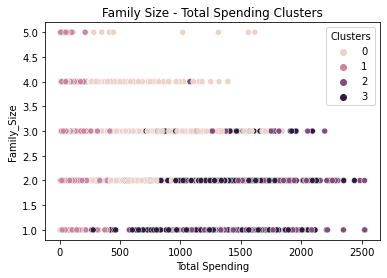

In [43]:
sns.scatterplot(data=data,x=data["Total Spending"],y=data["Family_Size"],hue=data["Clusters"]).set_title("Family Size - Total Spending Clusters")
plt.show()

From above graph it can be seen that the lower family size there is, the higher chance to spend more for a family. Thus it can be focused to cluster number 2 and 3 customers since they are the majority of high spending customers.

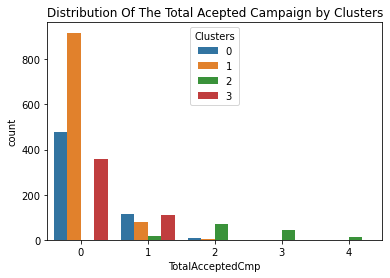

In [44]:
sns.countplot(data=data,x=data["TotalAcceptedCmp"], hue = data["Clusters"]).set_title("Distribution Of The Total Acepted Campaign by Clusters")
plt.show()

From above graph, lots of the customers did not accept the offered campaigns but cluster number 3. Definitely it should be given a campaign to cluster 3 customers since they are high income average spend customers. And also it should be considered to give a campaign to cluster number 2 customers since they are again high income and high spending customer group.

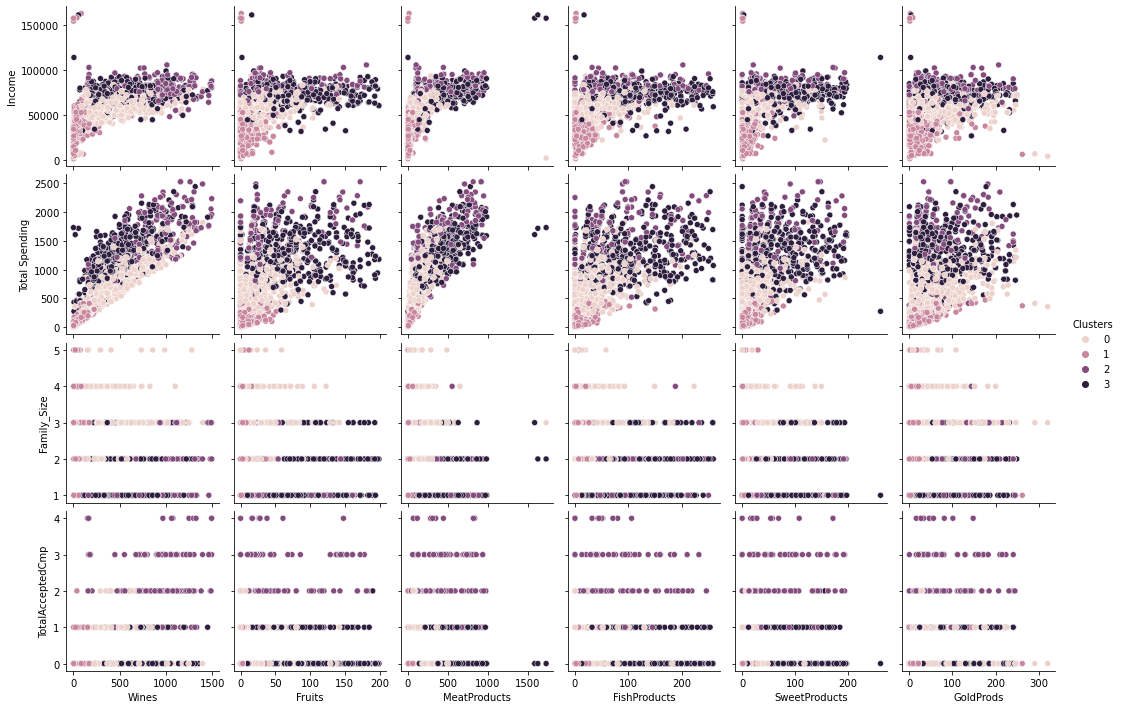

In [45]:
sns.pairplot(data,x_vars=["Wines","Fruits","MeatProducts","FishProducts","SweetProducts","GoldProds"],y_vars=["Income","Total Spending","Family_Size","TotalAcceptedCmp"],hue="Clusters")
plt.show()

In above plot, I tried to classify cluster by product type so marketing team can see which product to offet at which customer cluster. Cluster 3 customer accept all kinds of campaign and spending more on wines, fish, gold and meat products on the other hand cluster number 2 tends to spend more on wine and gold products. 

# Conclusion

In this notebook, I cluster customers and found total of 4 clusters. I analise clusters between total spending and income, family size and total accepted campaigns and finally I ploted pair-wise plot for all products to make better marketing strategies on right products. 